In [1]:
# import the data file

import pandas as pd

df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


custcat
1    266
2    217
3    281
4    236
Name: custcat, dtype: int64


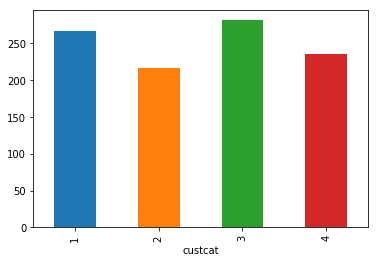

In [24]:
# count the category count values. 

import matplotlib.pyplot as plt

data=df.groupby('custcat').custcat.count()
print(data)
data.plot.bar()
plt.show()

In [11]:
# select related columns and normalise the data

feature_names=['region', 'age', 'tenure', 'income']
target_name=['custcat']
X=df[feature_names]
y=df[target_name]
print(X.head())
print(y.head())

# normalise the data for fiting
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[:5])

   region  age  tenure  income
0       2   44      13    64.0
1       3   33      11   136.0
2       3   52      68   116.0
3       2   33      33    33.0
4       2   30      23    30.0
   custcat
0        1
1        4
2        3
3        1
4        3
[[-0.02696767  0.18450456 -1.055125   -0.12650641]
 [ 1.19883553 -0.69181243 -1.14880563  0.54644972]
 [ 1.19883553  0.82182601  1.52109247  0.35951747]
 [-0.02696767 -0.69181243 -0.11831864 -0.41625141]
 [-0.02696767 -0.93080797 -0.58672182 -0.44429125]]


In [12]:
# Split the feature and target in train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(750, 4) (250, 4)
(750, 1) (250, 1)


In [13]:
# Classification using KNN algorithm

from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[1 2 2 4 3 4 2 3 3 2 1 1 1 1 1 1 3 1 3 1 4 1 1 3 2 3 3 3 1 2 3 2 3 4 2 1 3
 1 2 2 1 4 2 3 1 1 3 3 2 1 1 2 4 2 2 3 2 1 1 1 2 1 4 2 3 3 3 2 4 3 1 2 3 1
 4 1 1 3 1 3 4 1 3 4 1 1 1 3 1 1 2 4 3 1 1 3 4 3 1 2 1 1 3 2 4 1 1 3 2 1 3
 3 1 3 4 1 3 2 3 4 1 4 2 4 4 3 1 4 3 2 1 2 1 4 1 4 1 3 1 4 1 1 4 4 2 4 1 1
 1 1 3 3 2 1 2 4 1 3 4 1 1 1 3 1 1 1 1 4 1 4 1 3 1 1 4 2 1 1 1 3 3 4 1 1 2
 3 2 3 1 1 3 3 1 4 3 4 1 1 1 1 2 4 1 4 4 1 1 1 2 2 2 3 1 1 3 1 3 4 2 2 3 1
 2 4 1 1 1 1 2 1 2 1 3 2 3 4 1 1 2 1 2 1 1 4 1 2 1 4 3 1]


C:\Users\Manav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [15]:
# accuracy evaluation

from sklearn.metrics import accuracy_score

train_acc=accuracy_score(y_train, clf.predict(X_train))
test_acc=accuracy_score(y_test, y_pred)
print(train_acc)
print(test_acc)

0.548
0.268


C:\Users\Manav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Max score is at k= 5


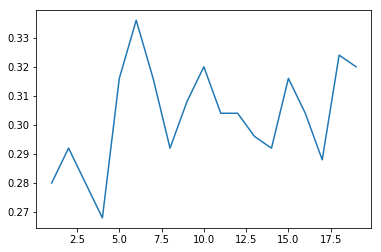

In [25]:
# calculate the best K value

score=[]
for k in range(1,20):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score.append(accuracy_score(y_test, clf.predict(X_test)))
plt.plot(range(1,20),score)
plt.show
print("Max score is at k=",score.index(max(score)))